In [1]:
import pandas as pd
import numpy as np
import feather
import matplotlib as mpl
mpl.use('nbAgg')
import matplotlib.pyplot as plt
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math
from kmodes.kmodes import KModes


%matplotlib inline

In [2]:
dset = pd.read_csv('../../Data/For_analysis_and_modeling/2nd_quadrimester/pred_analys_personal_data.csv', sep = '|')
dset.drop(['1st_model','2nd_model','3rd_model'],axis=1,inplace=True)

In [3]:
dset.head()

,des_plan,anio_apertura_expediente,abandona,convocatoria_acceso,des_acceso,sexo,lugar_origen,edad_acceso,becario,nota_admision_def_interval,cum_pass_ratio,cum_absent_ratio,expediente,cod_plan
0,GRADO EN INGENIERÍA CIVIL - CONSTRUCCIONES CIV...,2009-10,0,JUN,Selectividad,H,MISMO_MUNICIPIO,"(20.0, 25.0]",N,"(6.5, 8.0]","(-0.001, 0.25]","(0.25, 0.5]",1,1623
1,GRADO EN INGENIERÍA CIVIL - CONSTRUCCIONES CIV...,2009-10,0,JUN,Selectividad,D,OTRA_COMUNIDAD,"(20.0, 25.0]",S,"(6.5, 8.0]","(-0.001, 0.25]","(-0.001, 0.25]",2,1623
2,GRADO EN INGENIERÍA CIVIL - CONSTRUCCIONES CIV...,2009-10,1,JUN,Formación Profesional,H,OTRA_COMUNIDAD,"(30.0, 35.0]",S,"(6.5, 8.0]","(0.25, 0.5]","(0.5, 0.75]",3,1623
3,GRADO EN INGENIERÍA CIVIL - CONSTRUCCIONES CIV...,2009-10,0,JUN,Formación Profesional,D,OTRO_MUNICIPIO,"(25.0, 30.0]",N,"(6.5, 8.0]","(-0.001, 0.25]","(0.25, 0.5]",4,1623
4,GRADO EN INGENIERÍA CIVIL - CONSTRUCCIONES CIV...,2009-10,1,JUN,Selectividad,D,OTRO_MUNICIPIO,"(20.0, 25.0]",N,"(6.5, 8.0]","(0.25, 0.5]","(0.25, 0.5]",5,1623


In [4]:
dset.isnull().sum()

des_plan                      0
anio_apertura_expediente      0
abandona                      0
convocatoria_acceso           0
des_acceso                    0
sexo                          0
lugar_origen                  0
edad_acceso                   0
becario                       0
nota_admision_def_interval    0
cum_pass_ratio                0
cum_absent_ratio              0
expediente                    0
cod_plan                      0
dtype: int64

In [5]:
dset['exp_cod_plan'] = dset.apply(lambda func: str(func.cod_plan) + str(func.expediente),axis=1)
dset.drop(['expediente','cod_plan'],axis=1,inplace=True)

In [6]:
dset.head()

,des_plan,anio_apertura_expediente,abandona,convocatoria_acceso,des_acceso,sexo,lugar_origen,edad_acceso,becario,nota_admision_def_interval,cum_pass_ratio,cum_absent_ratio,exp_cod_plan
0,GRADO EN INGENIERÍA CIVIL - CONSTRUCCIONES CIV...,2009-10,0,JUN,Selectividad,H,MISMO_MUNICIPIO,"(20.0, 25.0]",N,"(6.5, 8.0]","(-0.001, 0.25]","(0.25, 0.5]",16231
1,GRADO EN INGENIERÍA CIVIL - CONSTRUCCIONES CIV...,2009-10,0,JUN,Selectividad,D,OTRA_COMUNIDAD,"(20.0, 25.0]",S,"(6.5, 8.0]","(-0.001, 0.25]","(-0.001, 0.25]",16232
2,GRADO EN INGENIERÍA CIVIL - CONSTRUCCIONES CIV...,2009-10,1,JUN,Formación Profesional,H,OTRA_COMUNIDAD,"(30.0, 35.0]",S,"(6.5, 8.0]","(0.25, 0.5]","(0.5, 0.75]",16233
3,GRADO EN INGENIERÍA CIVIL - CONSTRUCCIONES CIV...,2009-10,0,JUN,Formación Profesional,D,OTRO_MUNICIPIO,"(25.0, 30.0]",N,"(6.5, 8.0]","(-0.001, 0.25]","(0.25, 0.5]",16234
4,GRADO EN INGENIERÍA CIVIL - CONSTRUCCIONES CIV...,2009-10,1,JUN,Selectividad,D,OTRO_MUNICIPIO,"(20.0, 25.0]",N,"(6.5, 8.0]","(0.25, 0.5]","(0.25, 0.5]",16235


In [7]:
dset['nota_admision_def_interval'].value_counts()

(6.5, 8.0]      1251
(4.999, 6.5]     630
(8.0, 9.5]       224
(10.0, 11.5]      89
(11.5, 13.0]      45
(9.5, 10.0]       37
(13.0, 14.0]       5
Name: nota_admision_def_interval, dtype: int64

In [8]:
dset.isnull().sum()

des_plan                      0
anio_apertura_expediente      0
abandona                      0
convocatoria_acceso           0
des_acceso                    0
sexo                          0
lugar_origen                  0
edad_acceso                   0
becario                       0
nota_admision_def_interval    0
cum_pass_ratio                0
cum_absent_ratio              0
exp_cod_plan                  0
dtype: int64

In [9]:
# Import module for data manipulation
import pandas as pd
# Import module for linear algebra
import numpy as np
# Import module for data visualization
from plotnine import *
import plotnine
# Data visualization with matplotlib
import matplotlib.pyplot as plt
# Use the theme of ggplot
plt.style.use('ggplot')
# Import module for k-protoype cluster
from kmodes.kmodes import KModes

In [10]:
dfMatrix = dset.loc[:, dset.columns != 'exp_cod_plan'].to_numpy()
dfMatrix

array([['GRADO EN INGENIERÍA CIVIL - CONSTRUCCIONES CIVILES', '2009-10',
        0, ..., '(6.5, 8.0]', '(-0.001, 0.25]', '(0.25, 0.5]'],
       ['GRADO EN INGENIERÍA CIVIL - CONSTRUCCIONES CIVILES', '2009-10',
        0, ..., '(6.5, 8.0]', '(-0.001, 0.25]', '(-0.001, 0.25]'],
       ['GRADO EN INGENIERÍA CIVIL - CONSTRUCCIONES CIVILES', '2009-10',
        1, ..., '(6.5, 8.0]', '(0.25, 0.5]', '(0.5, 0.75]'],
       ...,
       ['GRADO EN INGENIERÍA INFORMÁTICA EN INGENIERÍA DEL SOFTWARE',
        '2016-17', 1, ..., '(6.5, 8.0]', '(-0.001, 0.25]',
        '(-0.001, 0.25]'],
       ['GRADO EN INGENIERÍA INFORMÁTICA EN INGENIERÍA DEL SOFTWARE',
        '2016-17', 1, ..., '(6.5, 8.0]', '(-0.001, 0.25]', '(0.5, 0.75]'],
       ['GRADO EN INGENIERÍA INFORMÁTICA EN INGENIERÍA DEL SOFTWARE',
        '2016-17', 1, ..., '(4.999, 6.5]', '(-0.001, 0.25]',
        '(0.5, 0.75]']], dtype=object)

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9


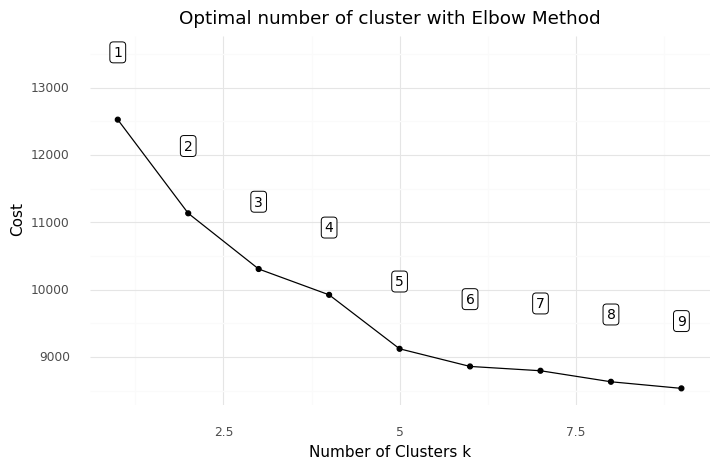

<ggplot: (8739854223433)>

In [11]:
# Choosing optimal K
cost = []
for cluster in range(1, 10):
    kmodes = KModes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
    kmodes.fit_predict(dfMatrix)
    cost.append(kmodes.cost_)
    print('Cluster initiation: {}'.format(cluster))
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster': range(1, 10), 'Cost': cost})
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

Probaremos con 5

In [12]:
# Fit the cluster
kmodes = KModes(n_jobs = -1, n_clusters = 5, init = 'Huang', random_state = 0)
kmodes.fit_predict(dfMatrix)
# Add the cluster to the dataframe
dset['Cluster Labels'] = kmodes.labels_


In [13]:
dset.head()

,des_plan,anio_apertura_expediente,abandona,convocatoria_acceso,des_acceso,sexo,lugar_origen,edad_acceso,becario,nota_admision_def_interval,cum_pass_ratio,cum_absent_ratio,exp_cod_plan,Cluster Labels
0,GRADO EN INGENIERÍA CIVIL - CONSTRUCCIONES CIV...,2009-10,0,JUN,Selectividad,H,MISMO_MUNICIPIO,"(20.0, 25.0]",N,"(6.5, 8.0]","(-0.001, 0.25]","(0.25, 0.5]",16231,4
1,GRADO EN INGENIERÍA CIVIL - CONSTRUCCIONES CIV...,2009-10,0,JUN,Selectividad,D,OTRA_COMUNIDAD,"(20.0, 25.0]",S,"(6.5, 8.0]","(-0.001, 0.25]","(-0.001, 0.25]",16232,4
2,GRADO EN INGENIERÍA CIVIL - CONSTRUCCIONES CIV...,2009-10,1,JUN,Formación Profesional,H,OTRA_COMUNIDAD,"(30.0, 35.0]",S,"(6.5, 8.0]","(0.25, 0.5]","(0.5, 0.75]",16233,0
3,GRADO EN INGENIERÍA CIVIL - CONSTRUCCIONES CIV...,2009-10,0,JUN,Formación Profesional,D,OTRO_MUNICIPIO,"(25.0, 30.0]",N,"(6.5, 8.0]","(-0.001, 0.25]","(0.25, 0.5]",16234,2
4,GRADO EN INGENIERÍA CIVIL - CONSTRUCCIONES CIV...,2009-10,1,JUN,Selectividad,D,OTRO_MUNICIPIO,"(20.0, 25.0]",N,"(6.5, 8.0]","(0.25, 0.5]","(0.25, 0.5]",16235,2


In [14]:
dset['Cluster Labels'].value_counts()

0    846
1    513
2    371
3    288
4    263
Name: Cluster Labels, dtype: int64

In [15]:
dset.to_csv('../../Data/For_analysis_and_modeling/2nd_quadrimester/cluster_analys_data.csv')